In [2]:
import numpy as np
import pandas as pd
from scipy import stats 

In [3]:
url = "https://raw.githubusercontent.com/100daysofml/100daysofml.github.io/refs/heads/main/content/Week_03/wine_quality.csv"
wine_data = pd.read_csv(url)

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
#Create new df
wine_datanew = wine_data

In [13]:
winequality_mean = round(np.mean(wine_datanew['quality']), 4)
winequality_median = np.median(wine_datanew['quality'])
winequality_variance = round(np.var(wine_datanew['quality']),4)
winequality_stdev = round(np.std(wine_datanew['quality'], ddof=1), 4)


print("Mean: ", winequality_mean)
print("Median: ", winequality_median)
print("Variance: ", winequality_variance)
print("stdev: ", winequality_stdev)

Mean:  5.657
Median:  6.0
Variance:  0.6488
stdev:  0.8058


In [6]:
#calc quartiles 
Q1 = np.quantile(wine_datanew['quality'], 0.25)
Q3 = np.quantile(wine_datanew['quality'], 0.75)

#Interquartile range
IQR = Q3 - Q1

print("Q1: ",Q1)
print("Q3: ", Q3)
print("IQ Range: ", IQR)

Q1:  5.0
Q3:  6.0
IQ Range:  1.0


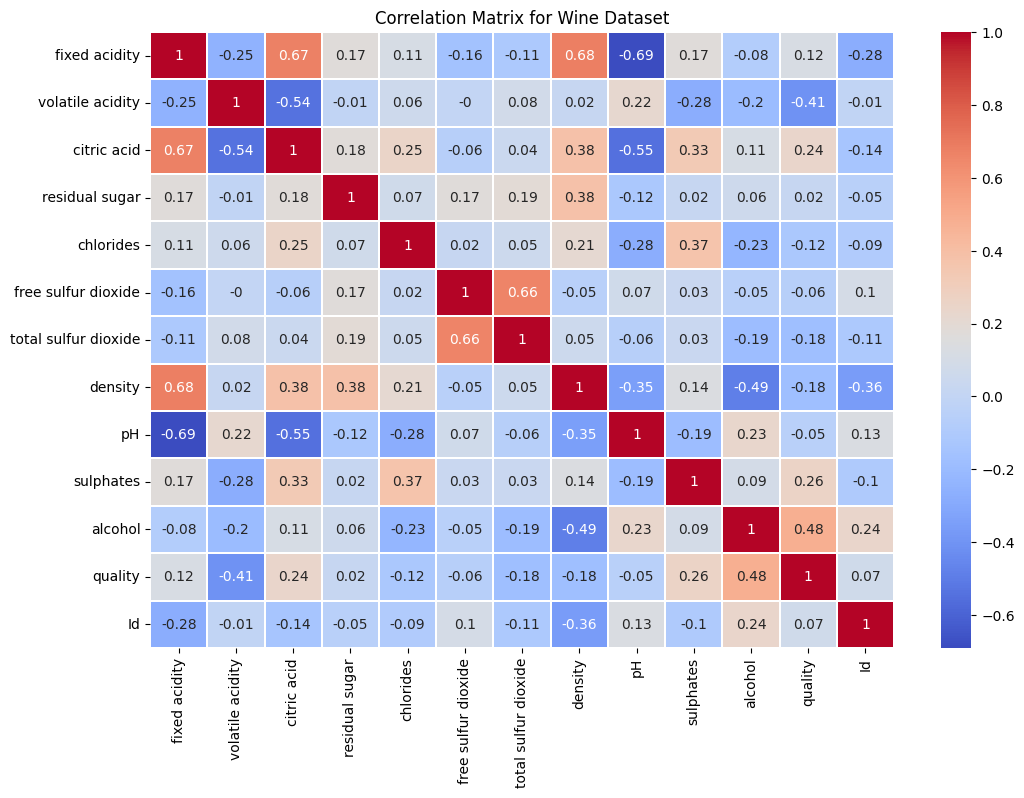

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#correlation matrix 
correlation_matrix = round(wine_datanew.corr(),2)

#plot the heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title("Correlation Matrix for Wine Dataset")
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

#handle missing values
wine_datanew.fillna(wine_data.mean(), inplace=True)

# encode categorical columns 
encoder = LabelEncoder()

wine_datanew['categorical_column'] = encoder.fit_transform(wine_data['quality'])

#normalize features 
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_datanew.drop('quality', axis=1))

In [19]:
from sklearn.model_selection import train_test_split

X = wine_data_scaled
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)

print("Accuracy: ", round(accuracy_score(y_test, predictions), 4))S

Accuracy:  0.9782
